# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

### Angela Fernanda Romero Fonseca - 201819276
### Carolina Padilla Hernández -201111402
### Juan Camilo Florez Caro - 201620135
### Juan Fernando Ortiz Serrano- 200623117

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics

In [2]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

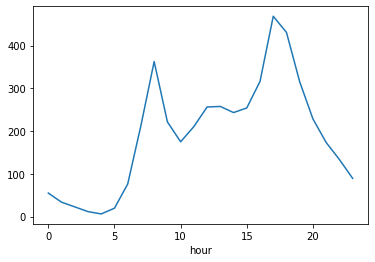

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot();

Plot for workingday == 0 and workingday == 1

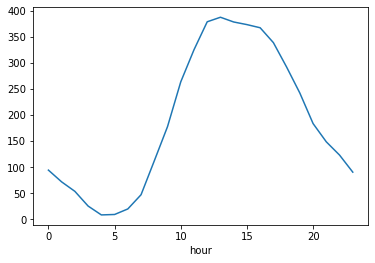

In [10]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot();

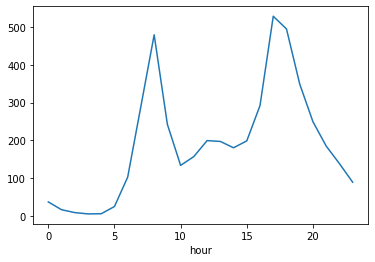

In [11]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot();

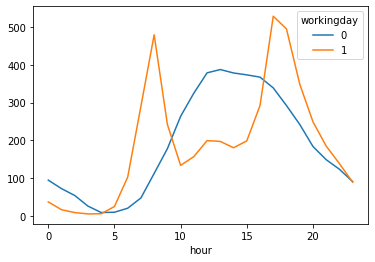

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Los dias laborales cuentan con dos picos en el día durante los cuales aumenta la demanda en la renta de bicicletas los cuales son entre las 6 y las 7 am y las 4 y las 6 de la tarde, lo cual está bastante alineado con los horarios laborales empresariales.
Por su parte, en los días no laborales el aumento en la demanda no es tan pronunciado, pero si es más prolongado, encontrandose su maximo entre las 11am y las 2pm

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [13]:
X= bikes[['hour', 'workingday']]
y=bikes[['total']]


reg= LinearRegression().fit(X, y)

mse_reg = reg.score(X, y)

coef= reg.coef_
inter= reg.intercept_

print("MSE Regresion: ", mse_reg)
print("coef: " ,coef)
print("Beta_0: " , inter)

MSE Regresion:  0.16059115011434855
coef:  [[10.49206282  4.07248627]]
Beta_0:  [67.70595026]


##### Interpretación de los Beta
Hora: Por cada hora adicional que pasa en el día el número total de bicicletas rentadas aumenta en 10 (Ceteris Paribus)
Dia Laboral: En los dias laborales se rentan en promedio 4 bicicletas más con respecto a los días no laborales (Ceteris paribus)

#### Limitaciones: 
Al tratarse de una regresión lineal se cuentan con inconvenientes en el momento que se evaluan los limites las horas limites del día, generando de esta manera una mayor impresición (Mayor MSE), adicionalmente según como se mostró gráficamente existen condiciones que dependen de si se trata o no de un día laboral por lo cual una unica función no puede ajustarse a ambos comportamientos


# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [14]:
y = bikes.total
#y = (bikes.total > bikes.total.mean()).astype(int)
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001
max_mse=9998

In [15]:
def calcular_mse(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    y_l = pd.DataFrame(y_l)
    y_l['pred'] = y_l['total'].mean()
    y_r = pd.DataFrame(y_r)
    y_r['pred'] = y_r['total'].mean()

    y_l_r = pd.concat([y_l,y_r])

    mse = ((((y_l_r['total'] - y_l_r['pred'])**2).mean()) ** 0.5)

    return mse

In [16]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 9999]  # j, split, mse
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            mse = calcular_mse(X.iloc[:, j], y, split)
                                   
            if mse < best_split[2]:
                best_split = [j, split, mse]
                            
    return best_split

In [17]:
def tree_grow(X, y, level=0, max_mse=9998, max_depth=None, num_pct=10):#
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1) #, max_mse=0
        return tree
    
    # Calculate the best split
    j, split, mse = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = y.mean()


    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], mse=mse)
    
    # Check stooping criteria
    if mse > max_mse:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_mse=max_mse, max_depth=max_depth, num_pct=num_pct) #
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_mse=max_mse, max_depth=max_depth, num_pct=num_pct) #
    
    
    return tree

In [18]:
tree = tree_grow(X, y, max_mse=9998, level=0, max_depth=3, num_pct=10)

In [19]:
tree

{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'mse': 153.86972728404962,
 'sr': {'y_pred': 258.6715578716402,
  'level': 1,
  'split': [0, 21.0],
  'n_samples': 7292,
  'mse': 166.19353774291216,
  'sr': {'y_pred': 132.15204678362574,
   'level': 2,
   'split': [0, 23.0],
   'n_samples': 1368,
   'mse': 72.98864033487493,
   'sr': {'y_pred': 89.50877192982456,
    'level': 3,
    'split': -1,
    'n_samples': 456,
    'mse': 51.5759019507669},
   'sl': {'y_pred': 153.47368421052633,
    'level': 3,
    'split': -1,
    'n_samples': 912,
    'mse': 79.15053168788128}},
  'sl': {'y_pred': 287.88808237677245,
   'level': 2,
   'split': [0, 16.0],
   'n_samples': 5924,
   'mse': 173.17579329186597,
   'sr': {'y_pred': 351.95877192982454,
    'level': 3,
    'split': -1,
    'n_samples': 2280,
    'mse': 186.4127508420061},
   'sl': {'y_pred': 247.79994511525797,
    'level': 3,
    'split': -1,
    'n_samples': 3644,
    'mse': 149.84031727976802}}},

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [26]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
rmse_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error').mean()
    rmse_scores.append(np.mean(np.sqrt(-scores)))

Text(0, 0.5, 'rmse_scores')

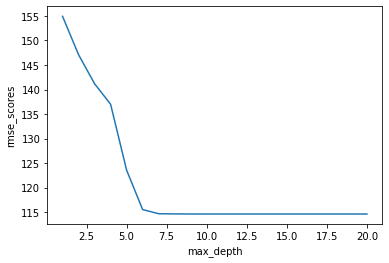

In [27]:
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('rmse_scores')

In [29]:
df = pd.DataFrame({'RMSE':rmse_scores,'Depth':range(1,21)})
df[df['RMSE']==min(df['RMSE'])]

,RMSE,Depth
9,114.643455,10
10,114.643455,11
11,114.643455,12
12,114.643455,13
13,114.643455,14
14,114.643455,15
15,114.643455,16
16,114.643455,17
17,114.643455,18
18,114.643455,19


<b>Conclusión:</b> El mejor desempeño se obtiene cuando el arbol cuenta con una profundidad de máxima de 10

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [77]:
df = pd.read_csv('datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [78]:
df.shape

(6000, 61)

In [79]:
X = df.drop(['url', 'Popular'], axis=1) #features
y = df['Popular']

In [106]:
df.groupby('Popular')['url'].count()

Popular
0    3000
1    3000
Name: url, dtype: int64

In [108]:
y.mean()

0.5

In [107]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

### Tree Classifier

In [109]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier #Utilizo la libreria 

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()) #Estima valores con el mejor accuracy en max_deprh


Text(0, 0.5, 'Accuracy')

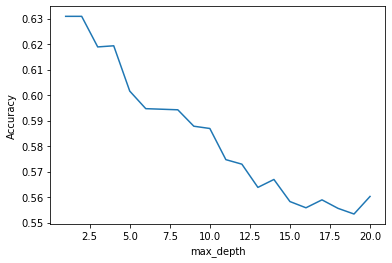

In [110]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [38]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308795368536799, 2)

La precisión del modelo sería de un 0.63 con una profundidad máximade 2

In [117]:
# max_depth=2 was best, so fit a tree using that parameter
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
F1_T= metrics.f1_score(y_pred, y_test)
Accurancy_T=metrics.accuracy_score(y_pred, y_test)
print("F1 Tree Classifier",F1_T )
print("Accurancy Tree Classifier",Accurancy_T )

F1 Tree Classifier 0.6448598130841121
Accurancy Tree Classifier 0.6453333333333333


### Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5) #Se hizo una regresión logistica para hacer ese imput 
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [120]:
lr.coef_


array([[-6.25626073e-04, -1.48468899e-05,  1.26217432e-04,
        -9.63019650e-07, -1.60402026e-06, -1.24790875e-06,
         2.38690373e-05, -3.50303074e-06,  2.67596929e-05,
         4.17034138e-06, -8.08262164e-06, -6.25917347e-06,
         9.32960354e-08, -6.82237317e-07, -9.20277067e-07,
         2.07834424e-07,  6.06714997e-07, -1.55544694e-06,
        -3.33389230e-04,  5.50861469e-06, -3.51974876e-04,
        -6.13050887e-07, -1.76065823e-06, -8.28130252e-07,
        -1.03794414e-04, -6.25082498e-05,  6.96007925e-04,
         7.22512705e-06,  2.00300044e-06, -2.60266980e-06,
        -8.89336011e-08, -6.80362791e-07, -6.69186255e-07,
        -2.10933996e-07, -5.02560424e-07,  9.77250424e-08,
         6.27080010e-07,  7.24805052e-07, -2.14559355e-07,
        -5.31108886e-07, -1.35974274e-06,  5.65780258e-07,
         1.12458705e-07, -4.84857323e-07, -1.54016679e-07,
        -4.56711084e-08, -2.94825781e-08, -1.00524903e-06,
        -5.98771238e-07, -5.83523340e-07, -2.14464278e-0

In [121]:
y_pred = lr.predict(X_test)
F1_T= metrics.f1_score(y_pred, y_test)
Accurancy_T=metrics.accuracy_score(y_pred, y_test)
print("F1 Logistic CV",F1_T )
print("Accurancy Logistic CV",Accurancy_T )

F1 Logistic CV 0.5979381443298968
Accurancy Logistic CV 0.61


# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [122]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegressionCV

In [123]:
tree_0= DecisionTreeRegressor(max_depth=None, random_state=123)
tree_1= DecisionTreeRegressor(max_depth=2, random_state=123)
logireg = LogisticRegressionCV(cv=5)

models = {0: tree_0,
          1: tree_1, 
          2: logireg}

In [124]:
models

{0: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'),
 1: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'),
 2: LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                      fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                      max_iter=10

In [126]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]
n_B = 300

# create 300 bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]


In [127]:
# DataFrame for storing predicted price from each tree
y_predE = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])


In [128]:
import math
# grow one tree for each bootstrap sample and make predictions on testing data
for i in range(300):
    m=math.floor((i)/100)
    X = X_train.iloc[samples[i],:]
    y = y_train.iloc[samples[i]]
    models[m].fit(X, y) #predicciones 
    y_predE[[i]] =  models[m].predict(X_test)

In [129]:
y_predE.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2185,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1
2520,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3721,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
3727,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [131]:
y_predE.sum(axis=1) #Sumo cuantos pronostican 1 y cuantos pronostican 0 si eso es mayor al 50% pronostico 1 sino 0 

1483    253.397118
2185    226.355620
2520    215.742875
3721    238.660744
3727     49.572424
           ...    
3077    102.177971
5166     68.116585
2227    225.654808
5684     80.652110
1937     64.559818
Length: 1500, dtype: float64

In [132]:
n_estimators = 300
y_pred = (y_predE.sum(axis=1) >= (n_estimators / 2)).astype(np.int)
#Metrics
F1_T= metrics.f1_score(y_pred, y_test)
Accurancy_T=metrics.accuracy_score(y_pred, y_test)
print("Voting F1",F1_T )
print(" Voting Accurancy",Accurancy_T )

Voting F1 0.6141304347826086
 Voting Accurancy 0.6213333333333333


# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [133]:
from sklearn.metrics import precision_recall_curve

y_best_voting = y_predE.sum(axis=1)/n_estimators #Tiene que quedar de y 1 


In [134]:
y_best_voting 

1483    0.844657
2185    0.754519
2520    0.719143
3721    0.795536
3727    0.165241
          ...   
3077    0.340593
5166    0.227055
2227    0.752183
5684    0.268840
1937    0.215199
Length: 1500, dtype: float64

In [135]:
precision, recall, thresholds = precision_recall_curve(y_test, y_best_voting)

f1_scores = 2*recall*precision/(recall+precision)
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))

Best threshold:  0.24548335938304533
Best F1-Score:  0.7082906857727739


Text(0.5, 1.0, 'Precision-Recall curve')

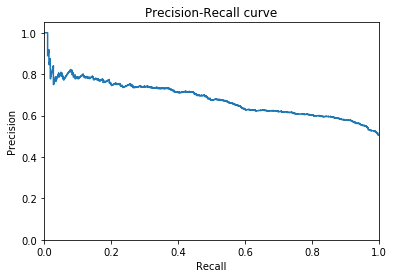

In [136]:
from sklearn.metrics import average_precision_score
plt.figure()
plt.step(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Precision-Recall curve')


# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [137]:
samples_oob = [] #Le doy un peso a cada uno de los modelos de acuerdo a que tan bueno fue para hacer las predicciones 
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [138]:
errors = np.zeros(n_estimators)
for i in range(n_estimators):
    md=math.floor((i)/100)
    y_pred_ = models[md].predict(X_train.iloc[samples_oob[i]])
    y_predW = (y_pred_>0.5).astype(int)
    #errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_predW)
    


Text(0.5, 1.0, 'OOB error of each tree')

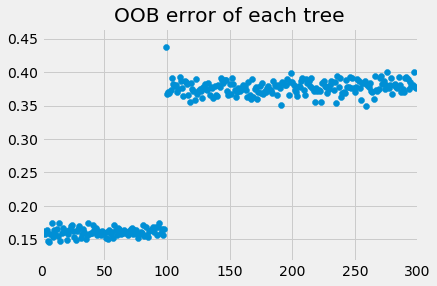

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree') #error de cada modelo, peor modelo error del 21, mejor modelo error 0.14

In [140]:
alpha = (1 - errors) / (1 - errors).sum() #Calculo ese alpha 

weighted_sum_1 = ((y_predE) * alpha).sum(axis=1) # Para cada modelo le aplico su alfa para tener el peso promedio 
weighted_sum_1.head(20) #Si esa probabilidad es mayor a 0.5 tomo 1 

1483    0.842684
2185    0.739946
2520    0.696833
3721    0.790271
3727    0.168497
4524    0.648483
234     0.157086
4735    0.324604
5839    0.437348
2939    0.695629
3053    0.726187
867     0.736590
276     0.738641
5798    0.183045
3512    0.806513
5789    0.180862
3198    0.740369
5908    0.804079
5718    0.304999
2687    0.174096
dtype: float64

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [141]:
y_predW = (weighted_sum_1 >= 0.5).astype(np.int)


#Metrics
F1_T= metrics.f1_score(y_predW, y_test)
Accurancy_T=metrics.accuracy_score(y_predW, y_test)
print("Weighted F1",F1_T )
print("Weighted Accurancy",Accurancy_T )

#metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

Weighted F1 0.621160409556314
Weighted Accurancy 0.63


# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [142]:
precision, recall, thresholds = precision_recall_curve(y_test, weighted_sum_1)

f1_scores = 2*recall*precision/(recall+precision)
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))


Best threshold:  0.2492889955800031
Best F1-Score:  0.708018154311649


Text(0.5, 1.0, 'Precision-Recall curve')

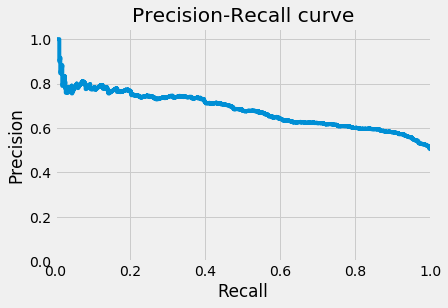

In [143]:
from sklearn.metrics import average_precision_score
plt.figure()
plt.step(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Precision-Recall curve')

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [144]:
X_train_2 =pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(300):
    m=math.floor((i)/100)
    X = X_train.iloc[samples[i],:]
    y = y_train.iloc[samples[i]]
    m = models[m].fit(X, y) #predicciones
    X_train_2[i] = m.predict(X_train) 

In [145]:
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
1225,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
324,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
5863,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,1,1,1,1,0,0,0,0,0
86,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,0


In [150]:
lr = LogisticRegressionCV(cv =5)
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [158]:
y_pred_stk =lr.predict_proba(y_predE)[:,1]

In [162]:
y_pred_stk_2 = (y_pred_stk >= 0.5).astype(np.int)
print('F1 Score: ', metrics.f1_score(y_pred_stk_2,y_test))
print('Accuracy: ', metrics.accuracy_score(y_pred_stk_2,y_test))

F1 Score:  0.6477946017116523
Accuracy:  0.6433333333333333


Y maximizando el F1 Score...

In [166]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_stk)

In [167]:
f1_scores = 2*recall*precision/(recall+precision)
print('Best Threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1 Score: ', np.max(f1_scores))

Best Threshold:  0.3243602118815612
Best F1 Score:  0.7105263157894736
